In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from datetime import datetime, date, time, timezone
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/Users/elle.le/Workspace/BoxSize_local/new_data/box_size_cleaned_data.csv')

In [3]:
df.shape

(528417, 8)

In [4]:
df.drop(columns = ['order_number'], inplace = True)

In [5]:
df.head()

,item_size_0,item_size_1,item_size_2,item_size_3,max_item_dim,total_order_vol,FedEx_box_type
0,3,0,0,0,76,19.86888,0
1,0,0,1,0,245,62.73960,1
2,1,0,0,1,260,27.73848,3
3,1,0,0,10,214,122.90136,1
4,0,0,0,2,175,8.31762,0


In [6]:
df.shape

(528417, 7)

In [7]:
df['FedEx_box_type'].value_counts()

0    187195
2    131528
3    109295
1     91191
4      9208
Name: FedEx_box_type, dtype: int64

In [8]:
# Keep the ratio of different box sizes
x_train,x_test,y_train, y_test = train_test_split(df.iloc[:,0:6], df['FedEx_box_type'], stratify = df['FedEx_box_type'])
y_train.value_counts()/y_train.shape[0]*100

In [10]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=25)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.8893649447909727
Random Forest test score 0.7785322281518489


In [11]:
# Try GBC
gb = GradientBoostingClassifier(max_depth=10, n_estimators=150)
gb.fit(x_train,y_train)
print('GB train score',gb.score(x_train,y_train))
print('GB test score',gb.score(x_test,y_test))

GB train score 0.8296443206362664
GB test score 0.7852920025737103


In [12]:
#Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced') 
dt.fit(x_train,y_train)
print('Decision Tree train score',dt.score(x_train,y_train))
print('Decision Tree test score',dt.score(x_test,y_test))

Decision Tree train score 0.891454207795878
Decision Tree test score 0.7430225956625411


In [13]:

#from sklearn.utils.class_weight import compute_class_weight

#weights = compute_class_weight('balanced', classes=list(range(6)), y=y_train)
#print(weights)

In [18]:
# Add prediction into original data (Decision Tree)
df['prediction'] = dt.predict(df.iloc[:,:6])
df.head(6)

,item_size_0,item_size_1,item_size_2,item_size_3,max_item_dim,total_order_vol,FedEx_box_type,prediction
0,3,0,0,0,76,19.86888,0,0
1,0,0,1,0,245,62.73960,1,1
2,1,0,0,1,260,27.73848,3,3
3,1,0,0,10,214,122.90136,1,1
4,0,0,0,2,175,8.31762,0,0
5,0,0,0,2,214,58.84488,3,3


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['FedEx_box_type'], df['prediction'])
#row = predicted, column = actual class

array([[152315,   1709,  21579,  10872,    720],
       [  1006,  80089,   1800,   3940,   4356],
       [  9581,   1158, 119472,    787,    530],
       [  9218,   3421,   3364,  92211,   1081],
       [   120,   1162,    204,    358,   7364]])

In [19]:
df.columns

Index(['item_size_0', 'item_size_1', 'item_size_2', 'item_size_3',
       'max_item_dim', 'total_order_vol', 'FedEx_box_type', 'prediction'],
      dtype='object')

In [20]:
dict(zip(df.columns,dt.feature_importances_))

{'item_size_0': 0.04711949192429405,
 'item_size_1': 4.108511834768783e-06,
 'item_size_2': 0.041829425495629326,
 'item_size_3': 0.06561045828901245,
 'max_item_dim': 0.3896735757256352,
 'total_order_vol': 0.4557629400535942}

In [3]:
# Testing more features

df2 = pd.read_csv('/Users/elle.le/Workspace/BoxSize_local/new_data/box_size_cleaned_data_max_features.csv')
df2.drop(columns=['order_number'], inplace = True)
print('Shape: ', df2.shape)
df2.head(3)

Shape:  (528418, 12)


,item_size_0,item_size_1,item_size_2,item_size_3,max_item_dim,max_item_vol,average_item_vol,min_item_vol,std_item_vol,total_item_vol,variance_item_vol,FedEx_box_type
0,3,0,0,0,76,11.43648,6.62296,2.60064,4.470740,19.86888,19.987515,1
1,0,0,1,0,245,62.73960,62.73960,62.73960,0.000000,62.73960,0.000000,3
2,1,0,0,1,260,16.30200,13.86924,11.43648,3.440442,27.73848,11.836642,2


In [4]:
df2['FedEx_box_type'].value_counts()

1    187197
0    131529
2    109295
3     91189
4      9208
Name: FedEx_box_type, dtype: int64

In [6]:
# Keep the ratio of different box sizes
x_train,x_test,y_train, y_test = train_test_split(df2.iloc[:,0:-1], df2['FedEx_box_type'], stratify = df2['FedEx_box_type'])
y_train.value_counts()/y_train.shape[0]*100

1    35.425787
0    24.891184
2    20.683399
3    17.257067
4     1.742562
Name: FedEx_box_type, dtype: float64

In [7]:
#Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced') 
dt.fit(x_train,y_train)
print('Decision Tree train score',dt.score(x_train,y_train))
print('Decision Tree test score',dt.score(x_test,y_test))

Decision Tree train score 0.8926202269418364
Decision Tree test score 0.7527951250898907


In [9]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=500, max_depth=15)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.821900871281033
Random Forest test score 0.7972748949699103


In [10]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=500, max_depth=20)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.8643925382210526
Random Forest test score 0.7993035842700882


In [11]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=18)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.8476053018699866
Random Forest test score 0.7994247000492033


In [14]:
# Try Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=20, max_leaf_nodes=100)
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

Random Forest train score 0.7699217537653319
Random Forest test score 0.7684266303319329


In [17]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="tree.dot", class_names=['0','1','2','3'],
feature_names=['item_size_0', 'item_size_1', 'item_size_2','item_size_3'], impurity=False, filled=True)

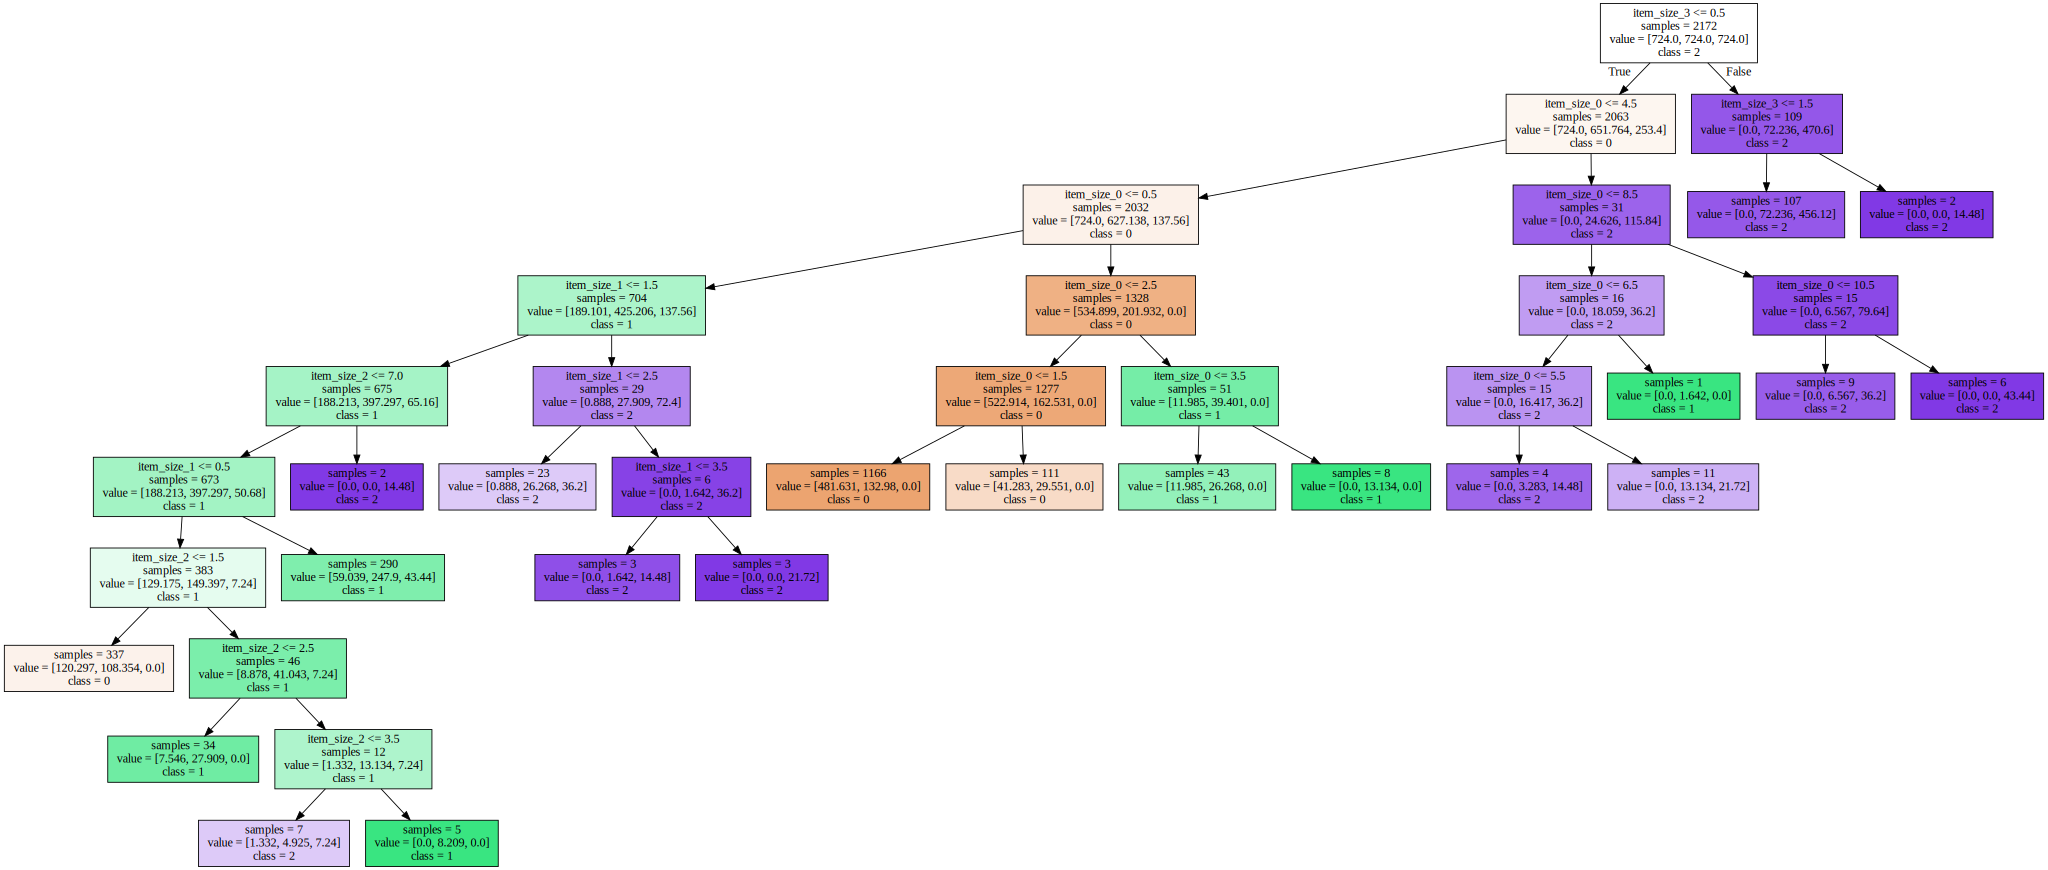

In [18]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)